In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Handy functions

In [2]:
def project_into_space(X_embedded, labels, class_names=None):
    """Function draws data embedded into 2-dimensional vector space"""
    
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(len(set(labels))):
        digit_indeces = (labels == i)
        dim1 = X_embedded[digit_indeces, 0]
        dim2 = X_embedded[digit_indeces, 1]
        if class_names != None:
            plot.scatter(dim1, dim2, label = class_names[i])
        else:
            plot.scatter(dim1, dim2, label = i)
    
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
# *args are arguments of function named func
def measure_time(func, *args):
    """Function measures program's time execution"""
    
    start_time = time.time()
    prog = func(*args)
    end_time = time.time()
    
    return end_time - start_time

### Constants

In [4]:
TIME_DICT = {
    'umap_time' : None,
    'humap_time' : None,
    'trimap_time': None,
    'pacmap_time' : None,
    'isomap_time' : None,
    'ivhd_time' : None
}

In [5]:
METRIC_DICT = {
    'umap_metric' : None,
    'humap_metric' : None,
    'trimap_time': None,
    'pacmap_metric' : None,
    'isomap_metric' : None,
    'ivhd_metric' : None
}

### Data preparation

In [6]:
df = pd.read_csv("./fmnist.csv", header = None)

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


In [10]:
SAMPLE_SIZE = 30000
SAMPLE_SIZE_TINY = 10000

full = np.array(df, dtype='float32')

X_full = full[:, :-1]
y_full = full[:,-1].astype('int')

X_small = X_full[:SAMPLE_SIZE]
y_small = y_full[:SAMPLE_SIZE]

X_tiny = X_full[:SAMPLE_SIZE_TINY]
y_tiny = y_full[:SAMPLE_SIZE_TINY]

df_full = pd.DataFrame(X_full)
df_full.to_csv('./fmnist_no_labels.csv', header = False, index = False)
df_labels = pd.DataFrame(y_full)
df_labels.to_csv('./fmnist_labels.csv', header = False, index = False)

help(df_full.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', line_terminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    Parameters
    ----------
    path_or_buf : str, path object, file-like object, or None, default None
   

In [16]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

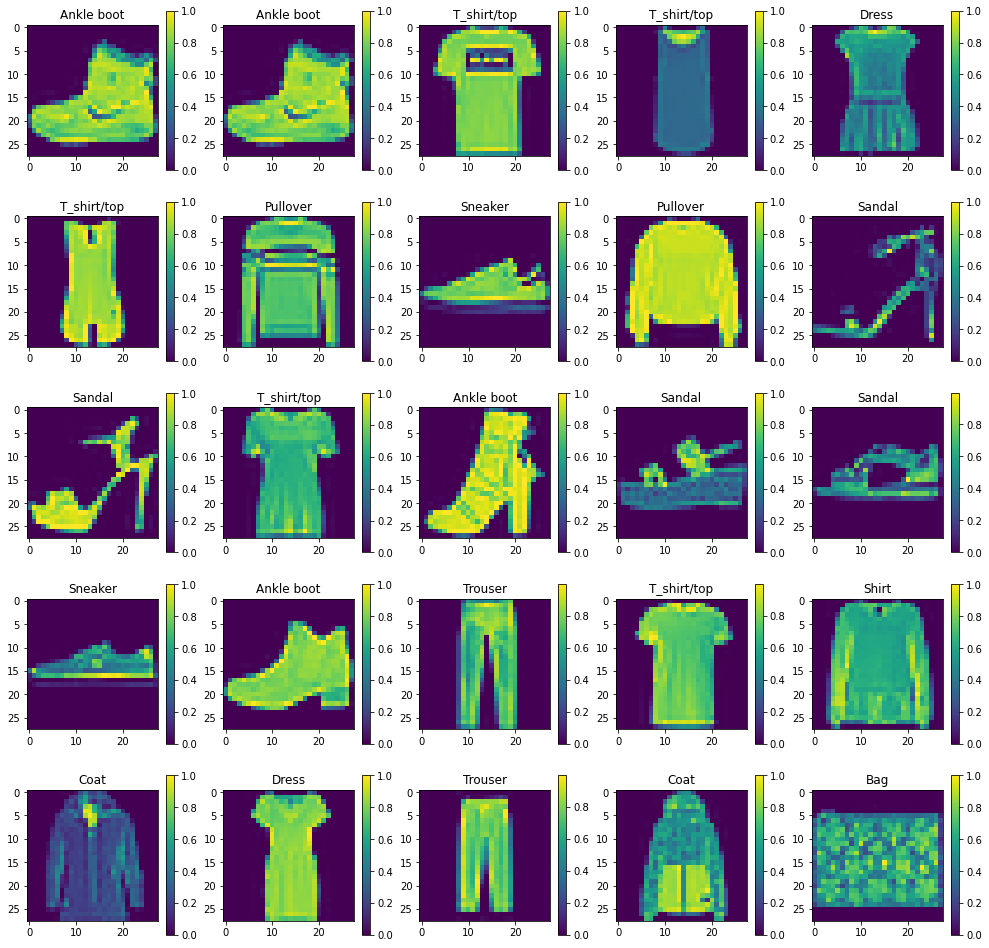

In [17]:
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_full[i].reshape((28,28)))
    plt.colorbar()
    label_index = int(y_full[i])
    plt.title(class_names[label_index])
plt.show()

### UMAP

In [18]:
import umap.umap_ as umap

In [19]:
umap_fmnist = umap.UMAP(random_state=42)

umap_start_time = time.time()
X_umap_fmnist_embedded = umap_fmnist.fit_transform(X_full)
umap_end_time = time.time()

TIME_DICT['umap_time'] = umap_end_time - umap_start_time

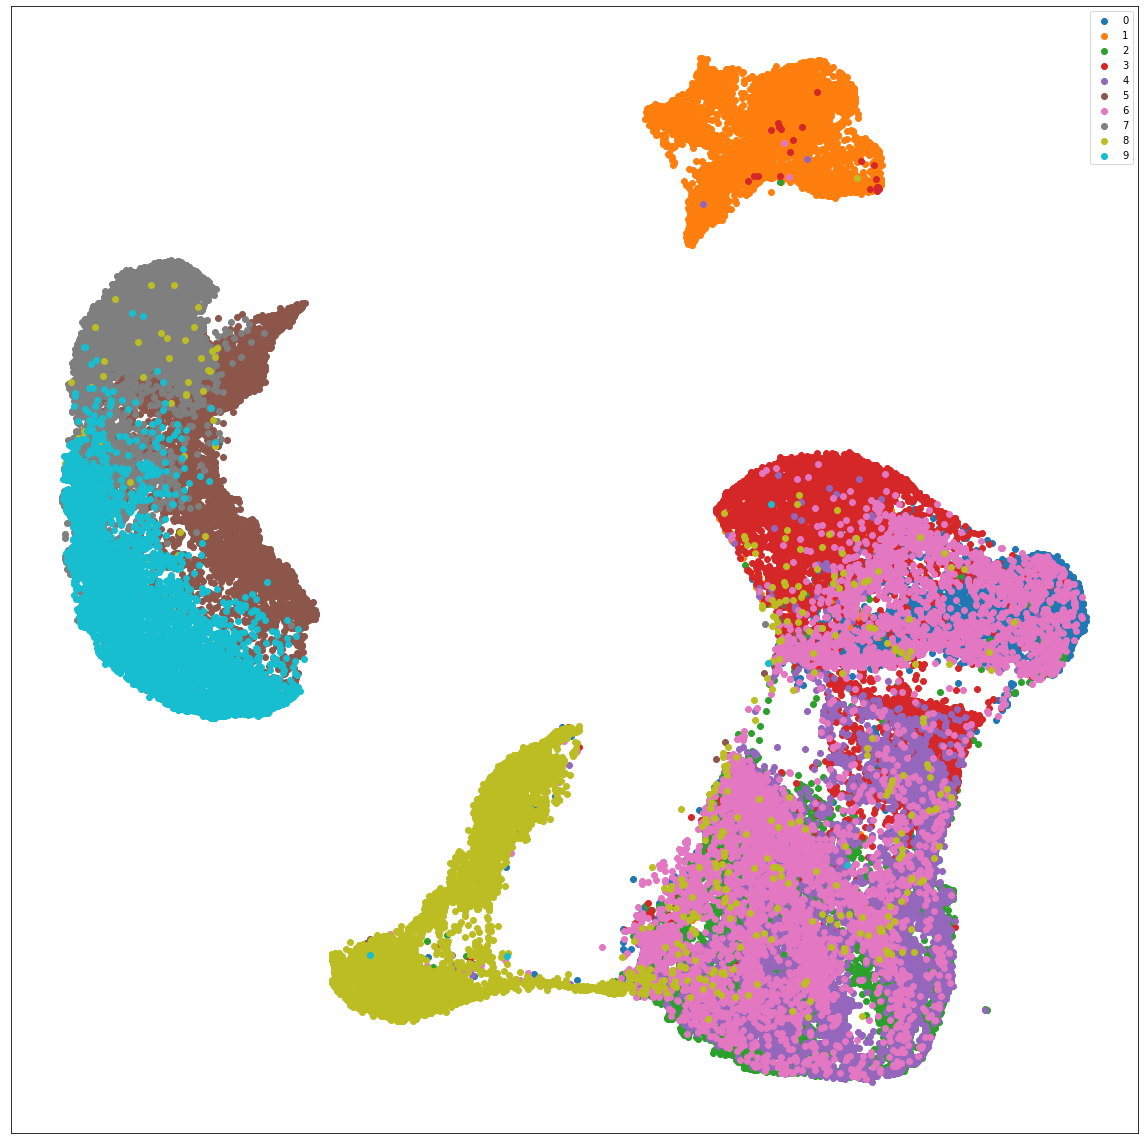

In [20]:
project_into_space(X_umap_fmnist_embedded, y_full)

### HUMAP

In [21]:
import humap

In [22]:
# List to store evaluation time for different hierarchies
TIME_DICT['humap_time'] = []

In [23]:
hUmap = humap.HUMAP()

humap_start_time = time.time()

hUmap.fit(X_small, y_small)
humap_embedding_l1 = hUmap.transform(1)

humap_end_time = time.time()

TIME_DICT['humap_time'].append(humap_end_time - humap_start_time)
y_l1 = hUmap.labels(1)



*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 30000 data samples.
Fitting the first hierarchy level... 
done in 25.412531 seconds.


*************************************************************************
*********************************LEVEL 1*********************************
*************************************************************************

Level 1: 6000 data samples.Computing random walks for sampling selection... 
done in 0.225065 seconds.
Computing random walks for constucting representation neighborhood... 
done in 7.209529 seconds.
Computing similarity among landmarks... 
done in 5.231751 seconds.
Fitting the hierarchy level... 
done in 0.367546 seconds.
Associating data points to landmarks... 
done in 0.015937 seconds.
Storing information for the next hierarchy level... 
done in

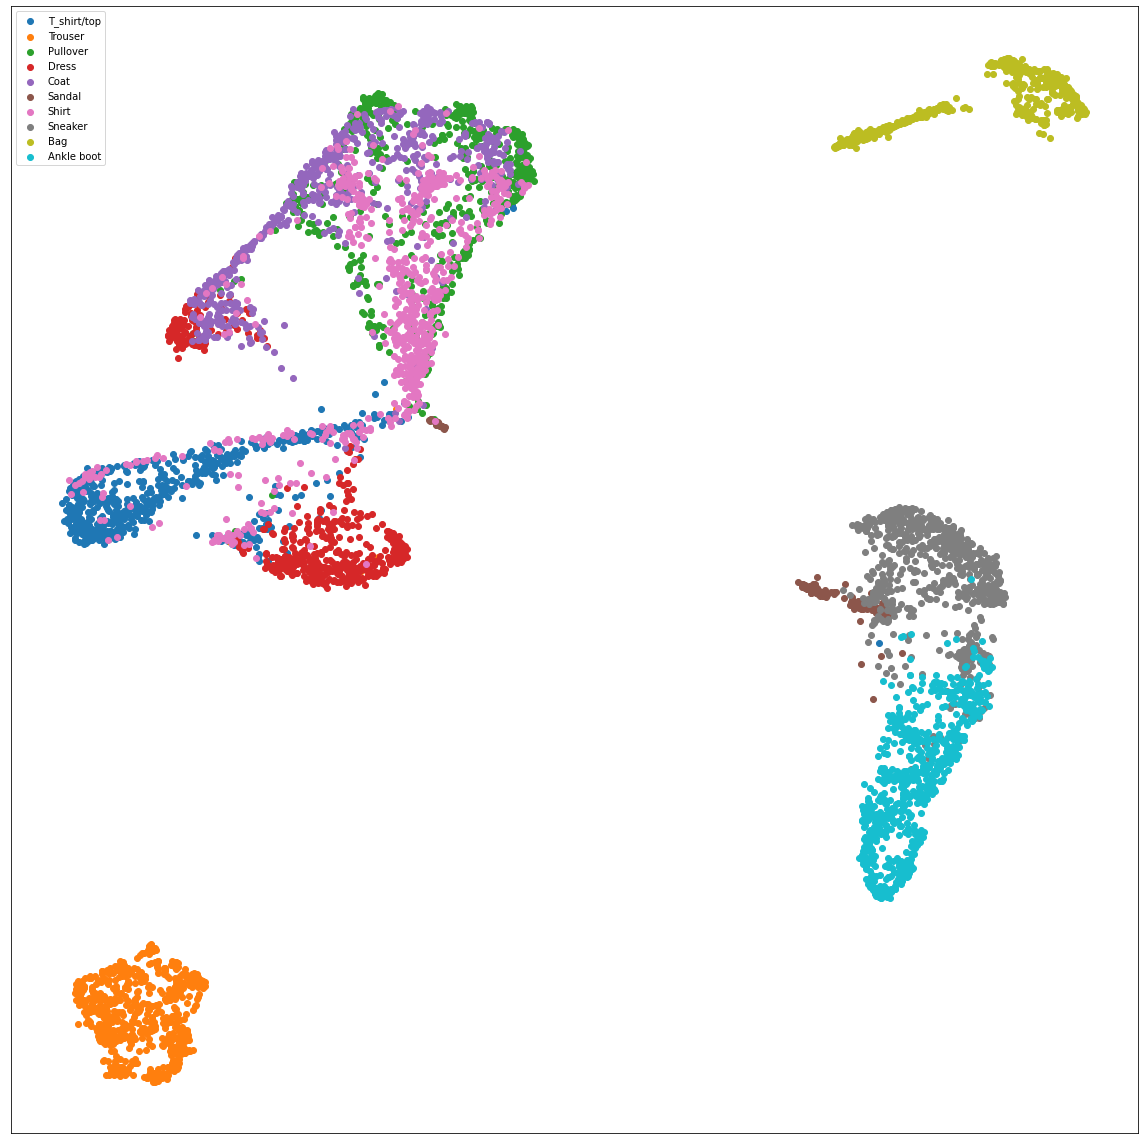

In [24]:
project_into_space(humap_embedding_l1, y_l1, class_names)

In [25]:
hUmap = humap.HUMAP()

humap_start_time = time.time()

hUmap.fit(X_small, y_small)
humap_embedding_l2 = hUmap.transform(2)

humap_end_time = time.time()

TIME_DICT['humap_time'].append(humap_end_time - humap_start_time)
y_l2 = hUmap.labels(2)



*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 30000 data samples.
Fitting the first hierarchy level... 
done in 22.044301 seconds.


*************************************************************************
*********************************LEVEL 1*********************************
*************************************************************************

Level 1: 6000 data samples.Computing random walks for sampling selection... 
done in 0.231851 seconds.
Computing random walks for constucting representation neighborhood... 
done in 0.380551 seconds.
Computing similarity among landmarks... 
done in 1.925168 seconds.
Fitting the hierarchy level... 
done in 0.303090 seconds.
Associating data points to landmarks... 
done in 0.014495 seconds.
Storing information for the next hierarchy level... 
done in

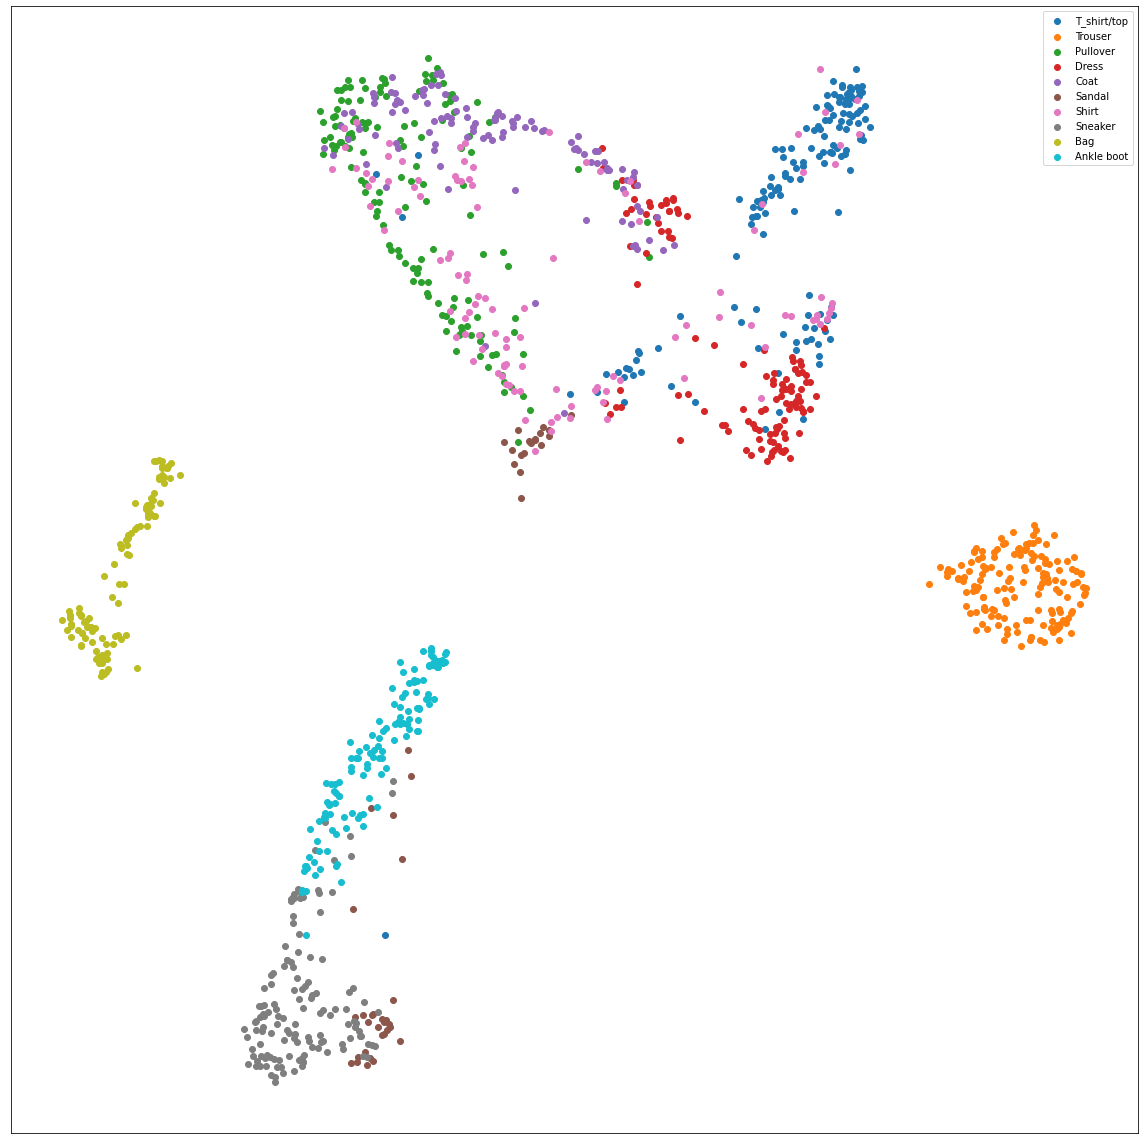

In [26]:
project_into_space(humap_embedding_l2, y_l2, class_names)

### triMAP

In [27]:
import trimap as trmp

In [28]:
# List to store evaluation time for different metrics
TIME_DICT['trimap_time'] = []

In [29]:
trimap_start_time = time.time()
trimap_embedding_euclidean = trmp.TRIMAP(distance = 'euclidean').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

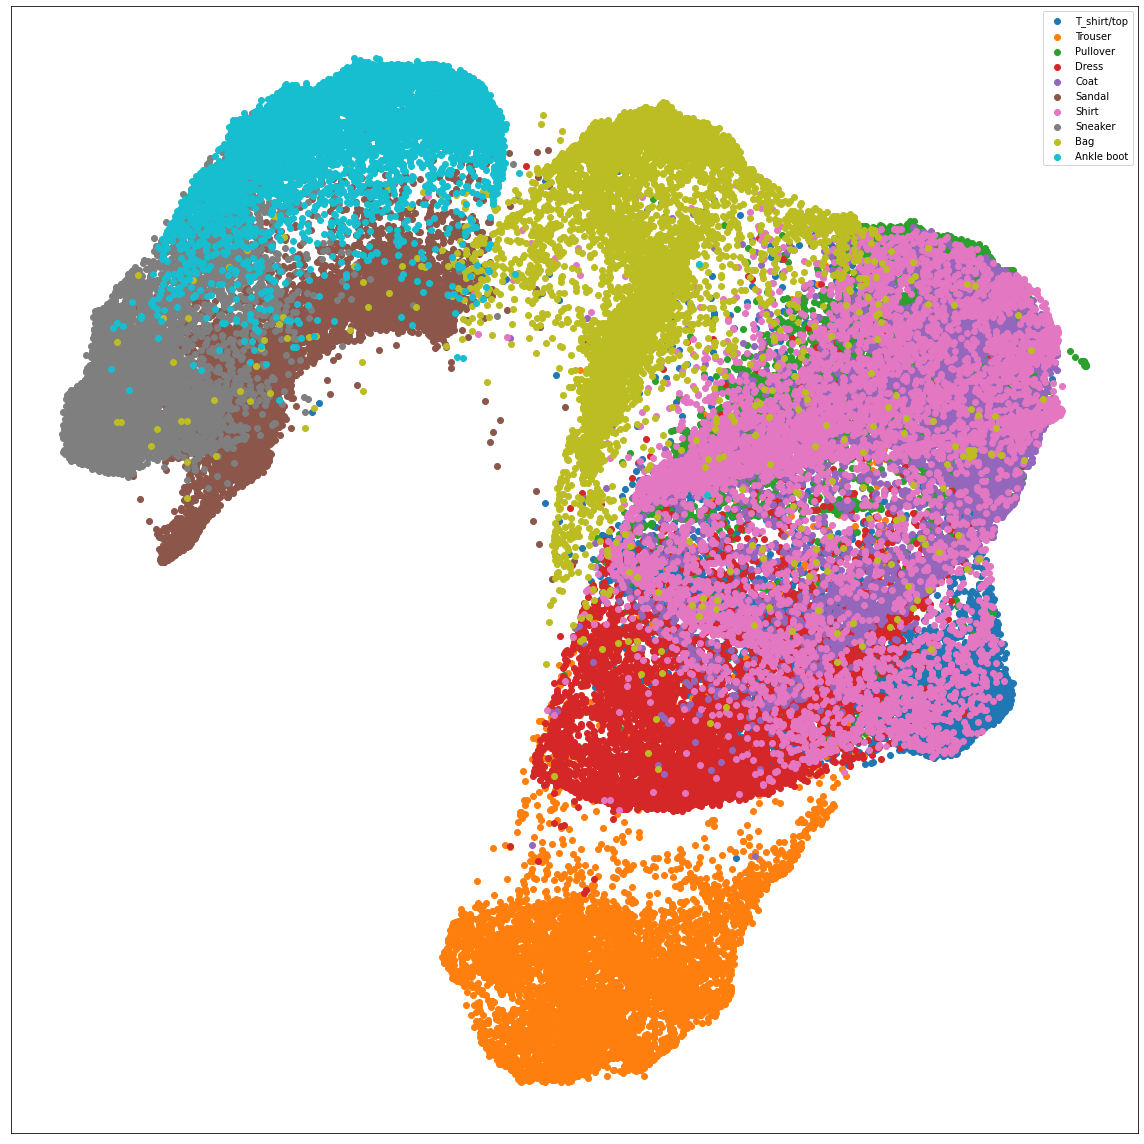

In [30]:
project_into_space(trimap_embedding_euclidean, y_full, class_names)

In [31]:
trimap_start_time = time.time()
trimap_embedding_manhattan = trmp.TRIMAP(distance = 'manhattan').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

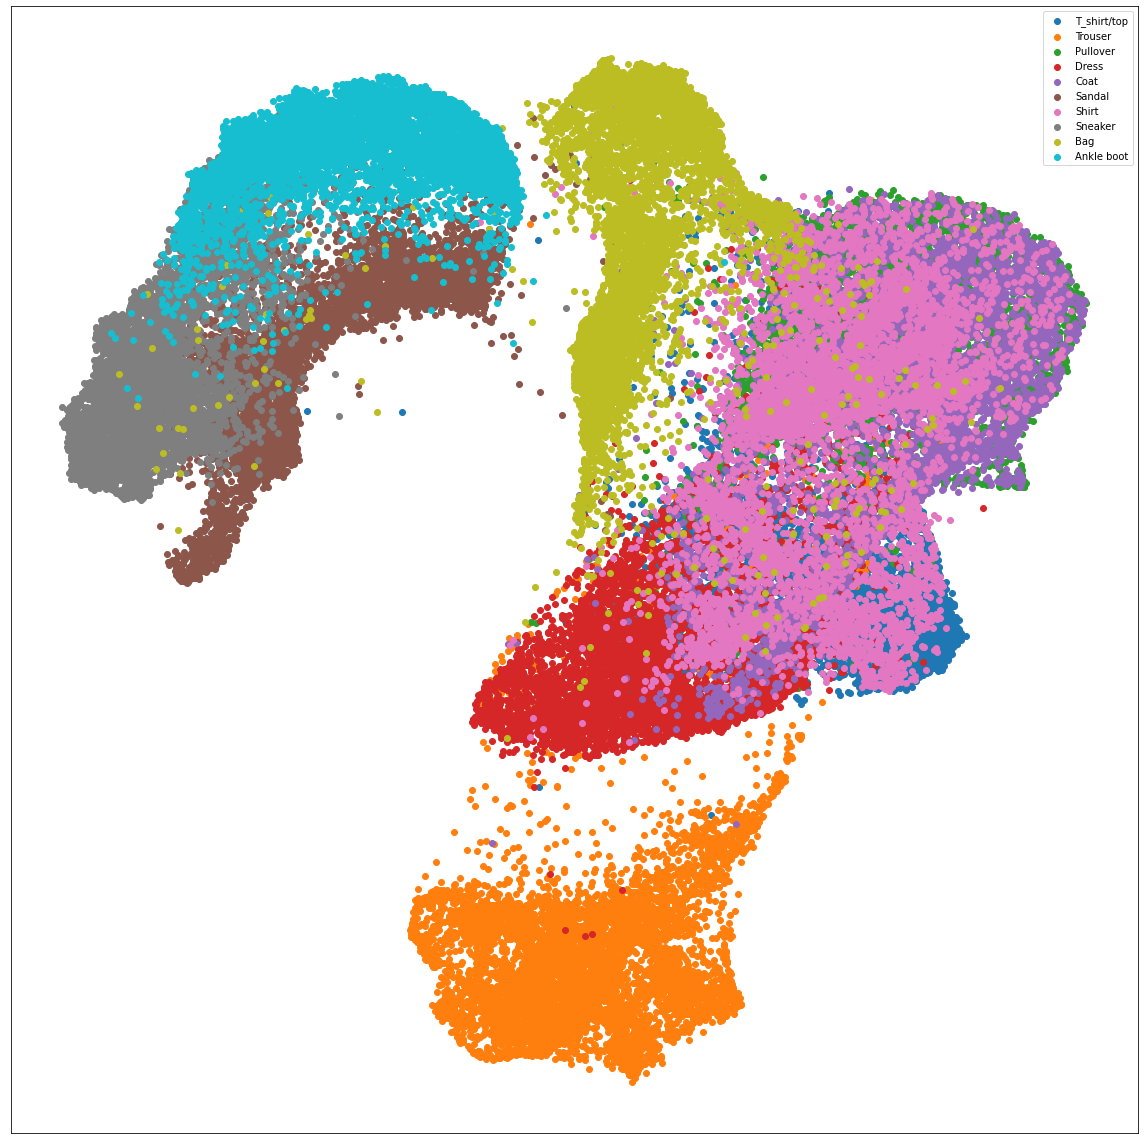

In [32]:
project_into_space(trimap_embedding_manhattan, y_full, class_names)

In [33]:
trimap_start_time = time.time()
trimap_embedding_cosine = trmp.TRIMAP(distance = 'cosine').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

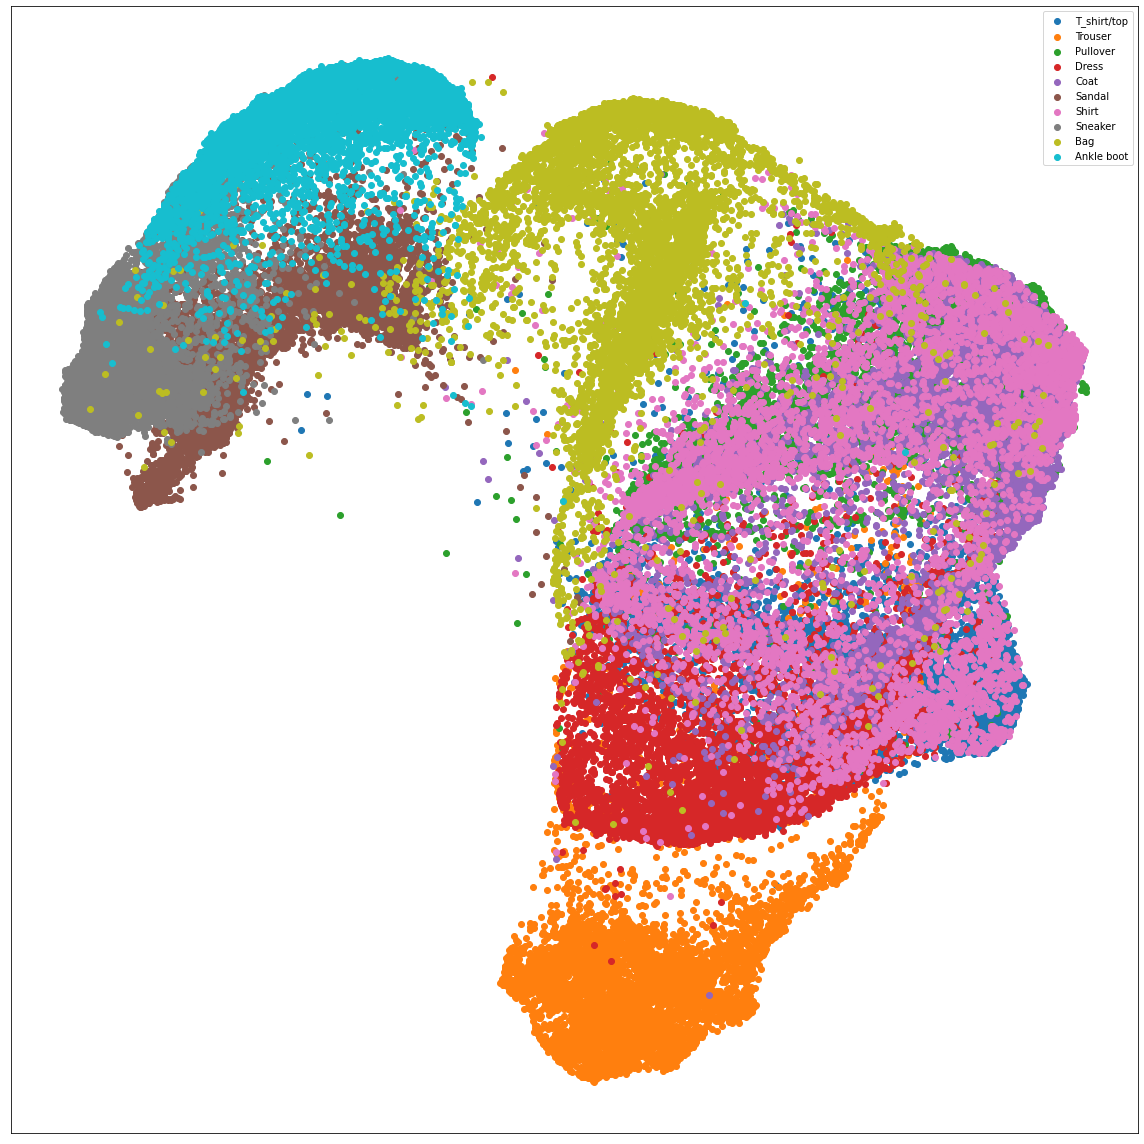

In [34]:
project_into_space(trimap_embedding_cosine, y_full, class_names)

### PacMAP

In [35]:
import pacmap as pcmp

In [36]:
pacmap_start_time = time.time()
pacmap_embedding = pcmp.PaCMAP().fit_transform(X_full)
pacmap_end_time = time.time()

TIME_DICT['pacmap_time'] = pacmap_end_time - pacmap_start_time

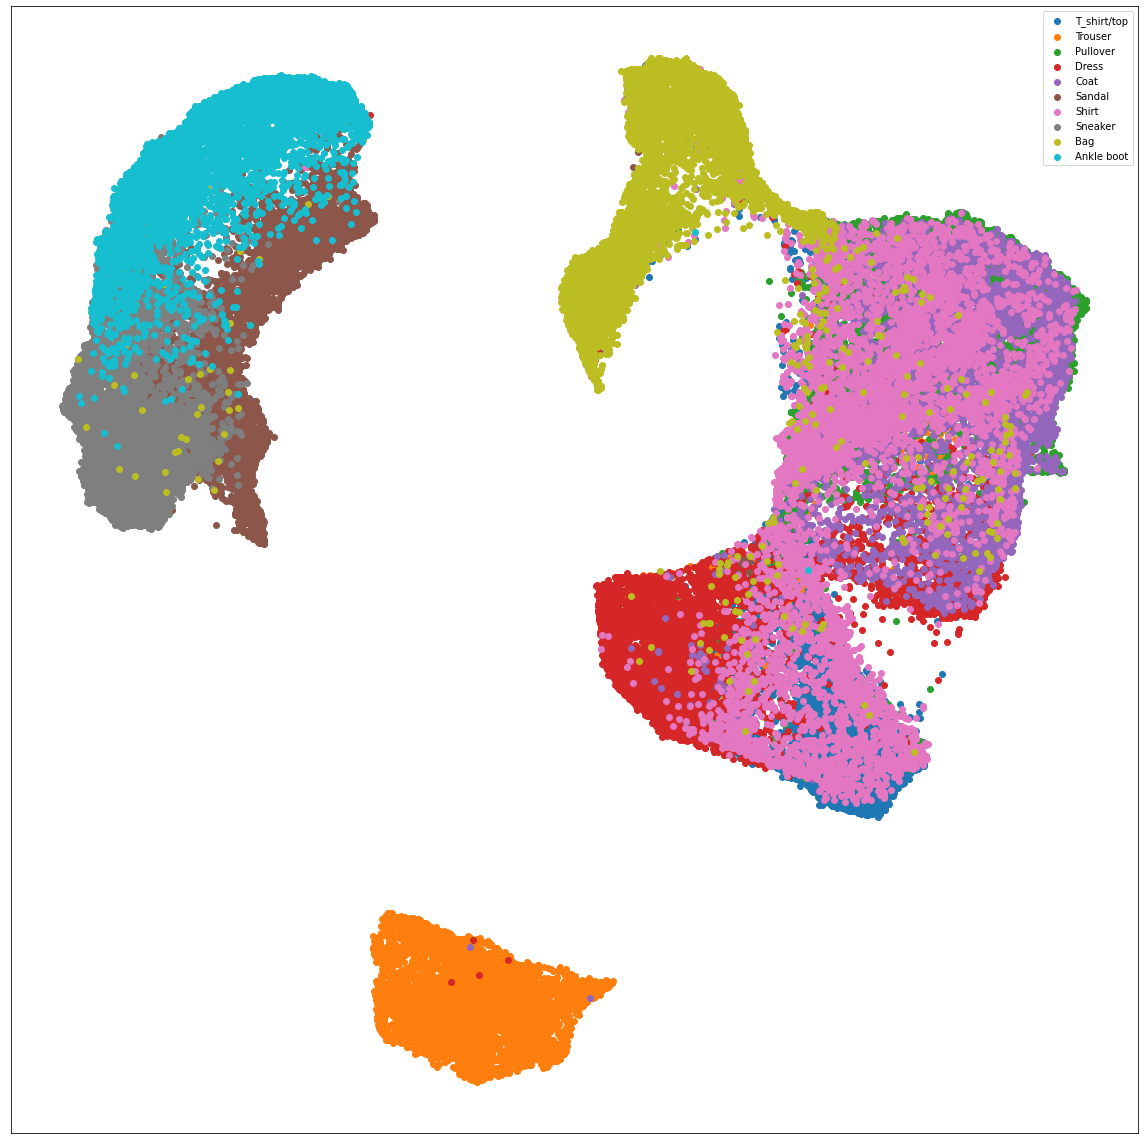

In [37]:
project_into_space(pacmap_embedding, y_full, class_names)

### Isomap

In [38]:
from sklearn.manifold import Isomap

In [39]:
# List to store evaluation time for different metrics
TIME_DICT['isomap_time'] = []

In [40]:
isomap_start_time = time.time()
isomap_embedding_minkowski = Isomap(n_components = 2, p = 1).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

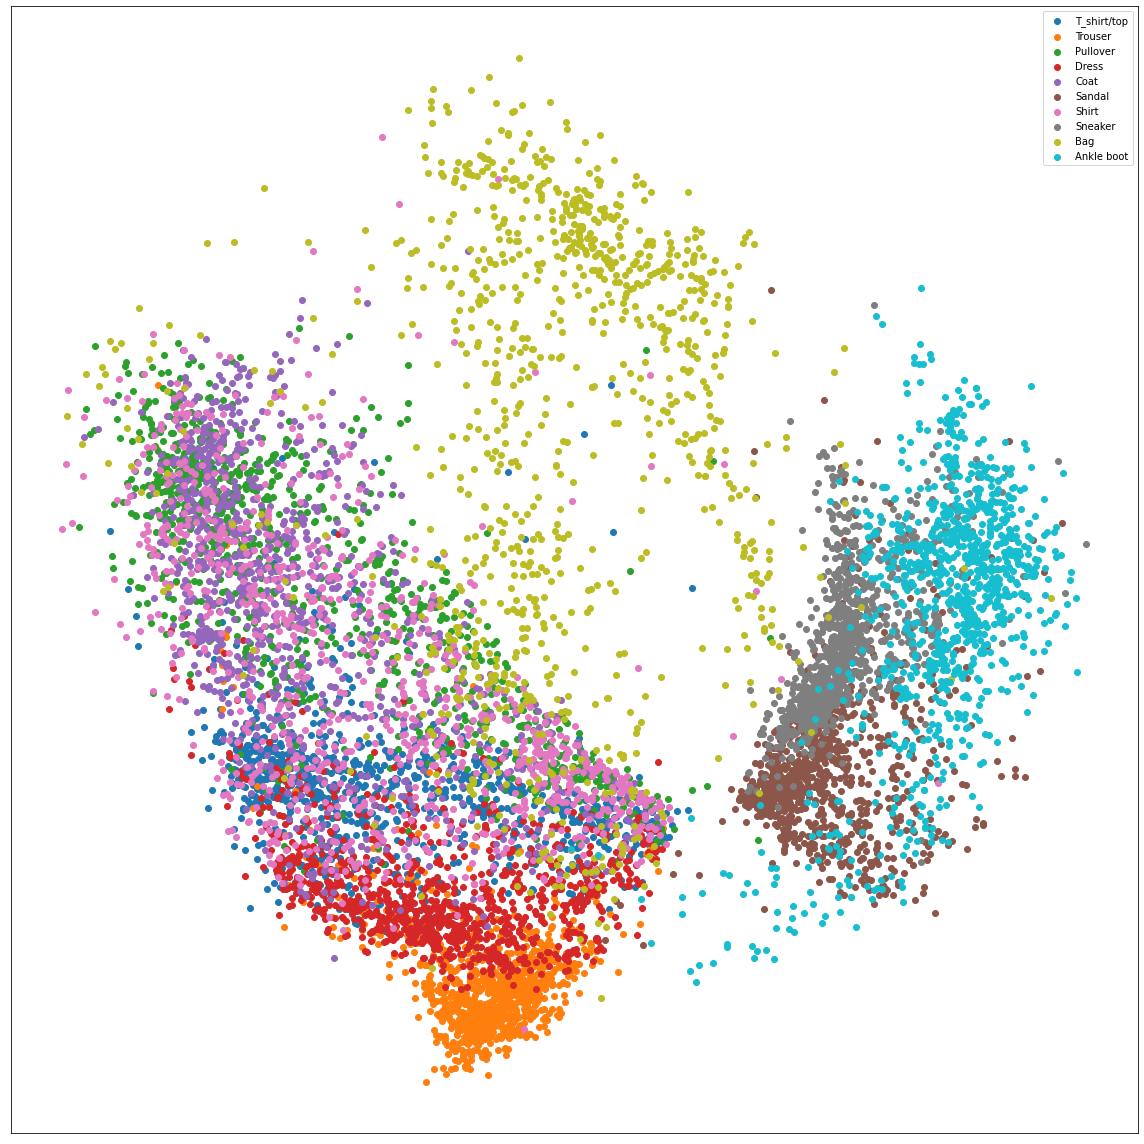

In [41]:
project_into_space(isomap_embedding_minkowski, y_tiny, class_names)

In [42]:
isomap_start_time = time.time()
isomap_embedding_euclidean = Isomap(n_components = 2, p = 2).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

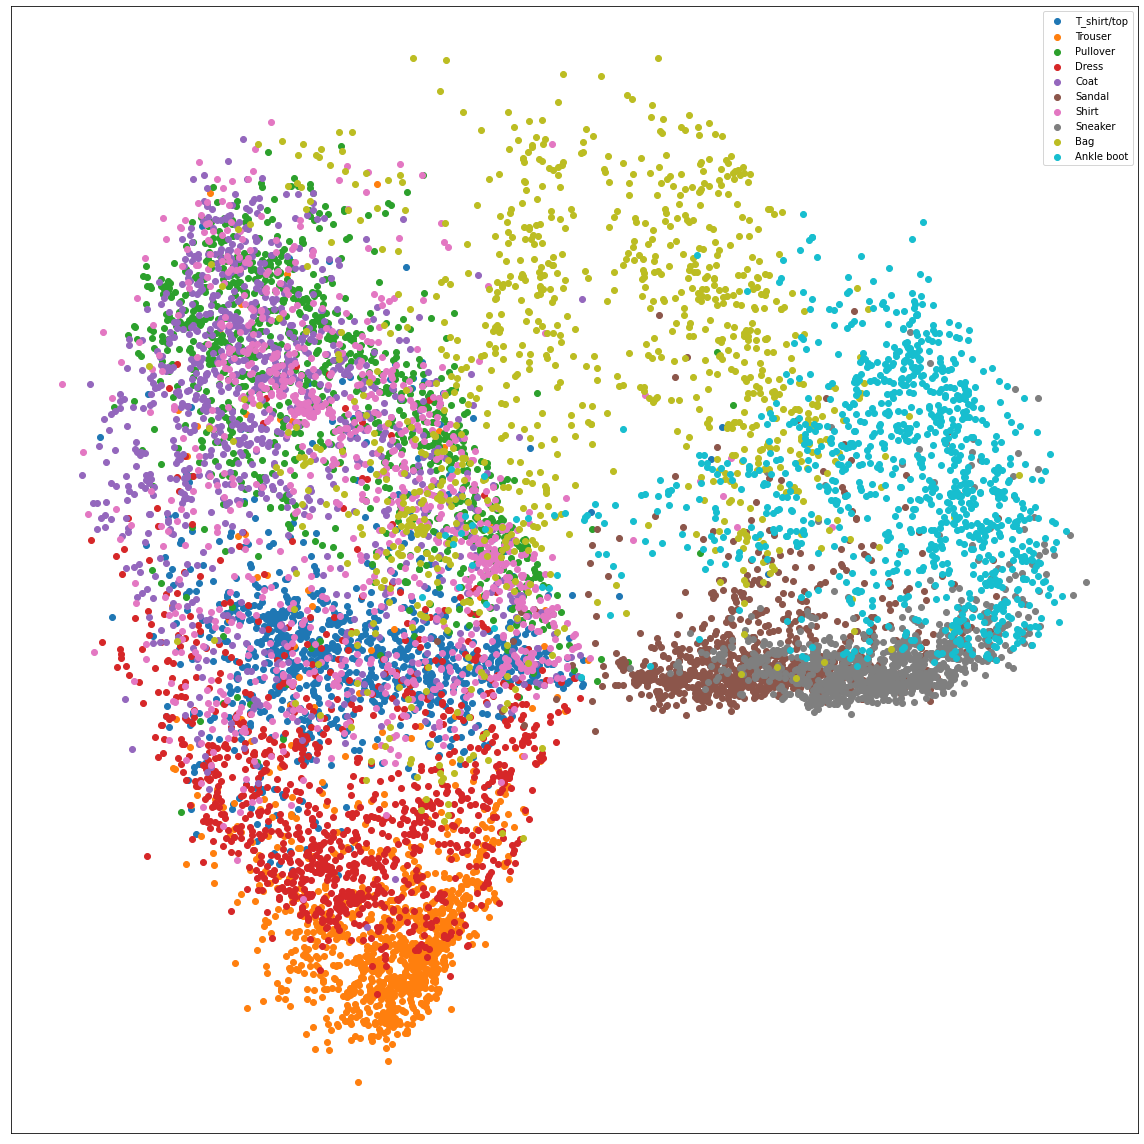

In [43]:
project_into_space(isomap_embedding_euclidean, y_tiny, class_names)

In [44]:
isomap_start_time = time.time()
isomap_embedding_cosine = Isomap(n_components = 2, metric = 'cosine').fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

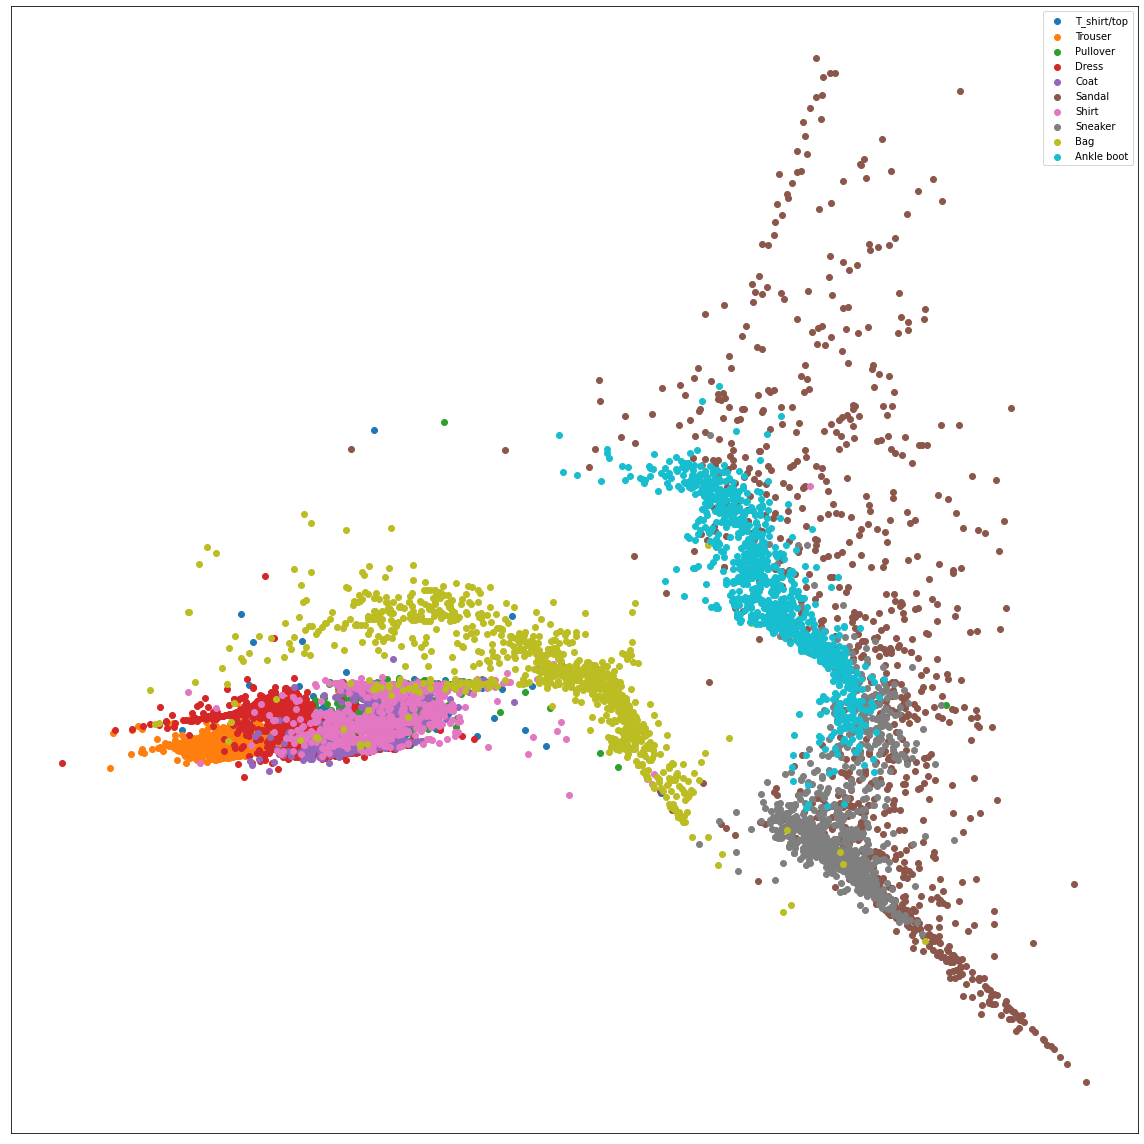

In [45]:
project_into_space(isomap_embedding_cosine, y_tiny, class_names)

In [46]:
TIME_DICT

{'umap_time': 159.4194459915161,
 'humap_time': [55.900389671325684, [28.03985047340393]],
 'trimap_time': [167.08398151397705, 156.90547919273376, 158.339026927948],
 'pacmap_time': 95.07708716392517,
 'isomap_time': [210.5667805671692, 143.6706621646881, 88.2086353302002],
 'ivhd_time': None}

## IVHD

In [2]:
ivhd_data = pd.read_csv('./fmnist_ivhd_euclidean_5_neighbors.txt.txt', header = None)

In [4]:
ivhd_data = ivhd_data.iloc[:, :3]

In [8]:
ivhd_data.columns = ['x', 'y', 'label']
ivhd_data.head(10)

,x,y,label
0,0.547743,-0.118005,9
1,0.545840,-0.119700,9
2,-0.142866,0.740080,0
3,0.007348,0.570533,0
4,-0.021462,0.359218,3
5,0.050209,0.552875,0
6,-0.639439,0.130948,2
7,0.293096,-0.656674,7
8,-0.637411,0.043268,2
9,0.198988,-0.255169,5


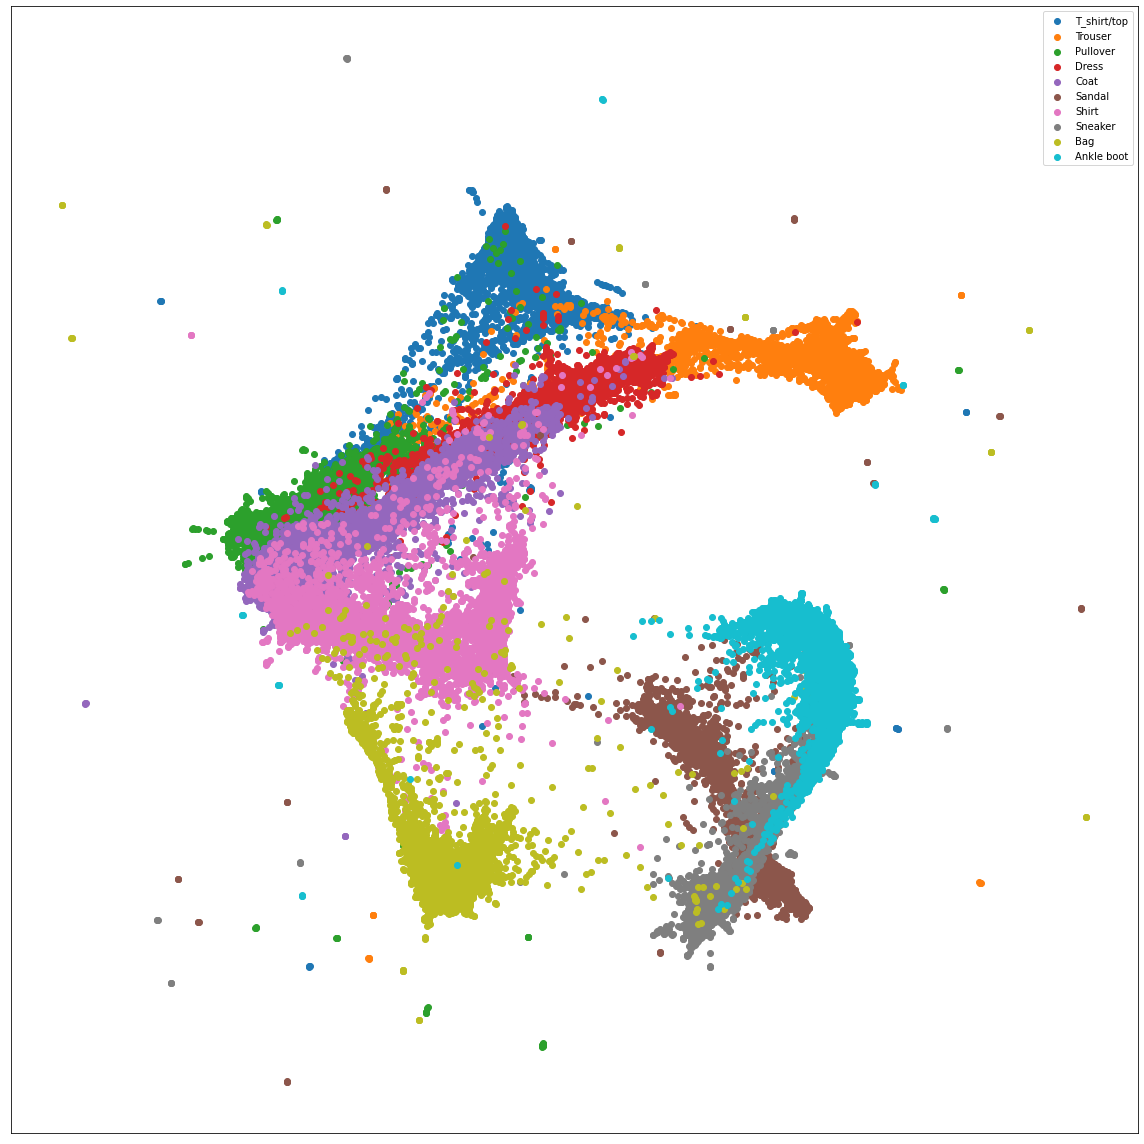

In [22]:
project_into_space(ivhd_data.values[:,:2], ivhd_data.values[:, -1], class_names)

### Comparison

In [25]:
import local_score

Calculating d_hd
umap
Calculating d_hd
trimap
Calculating d_hd
pacmap
Finished.


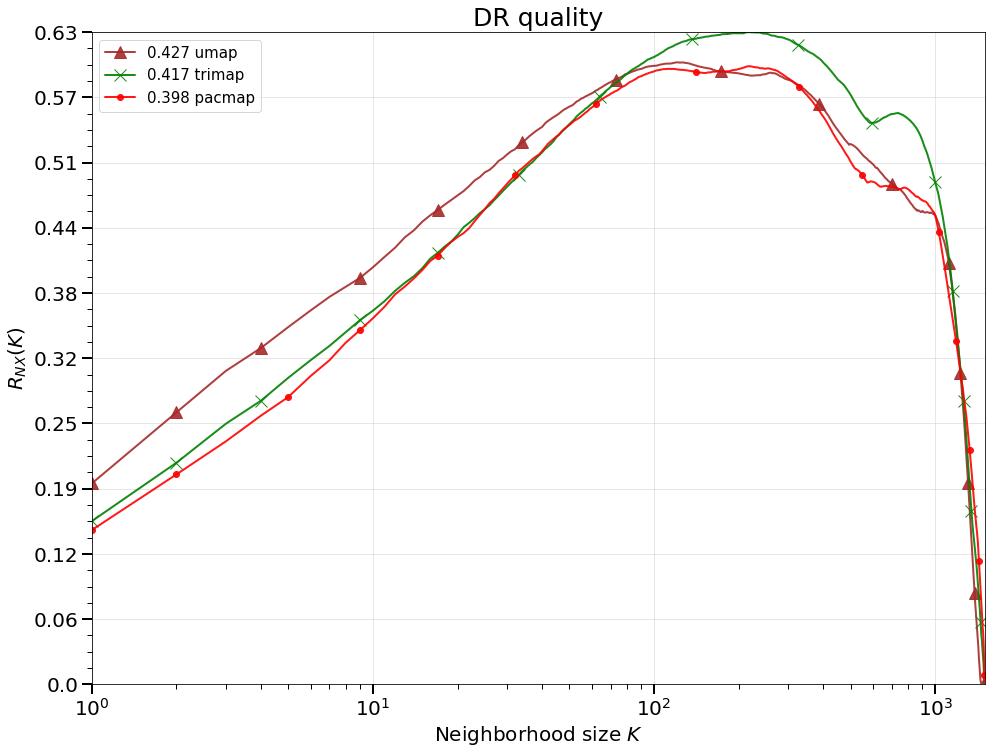

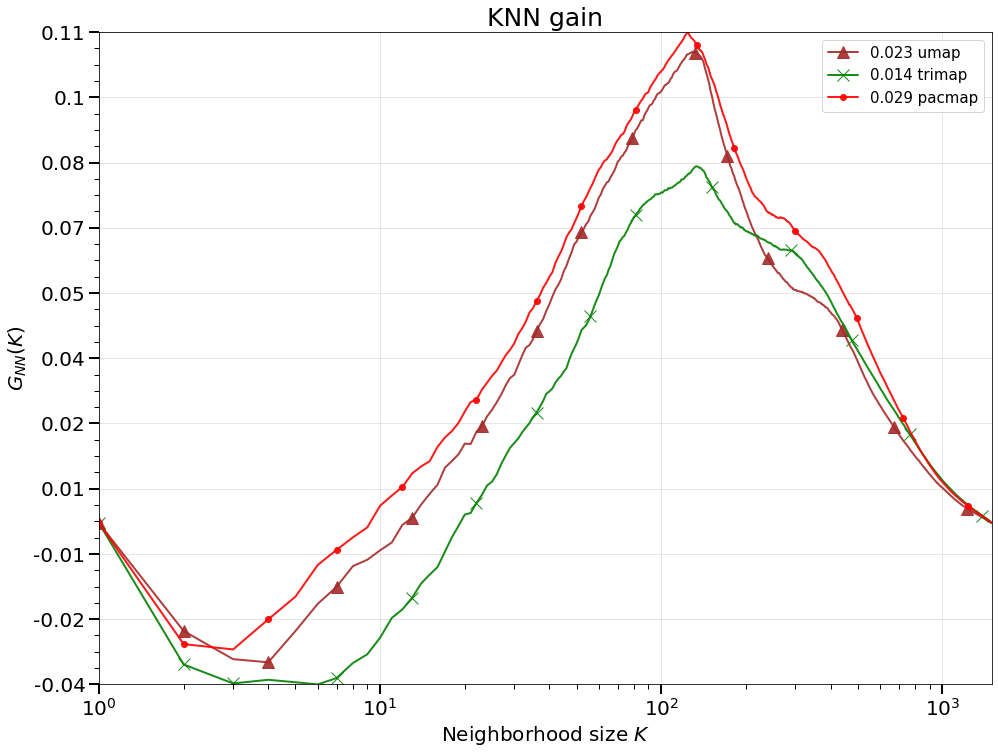

In [27]:
local_metrics = local_score.LocalMetric()

dataset = X_small
labels = y_small

X_embedded = X_umap_fmnist_embedded
method_name = "umap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

# X_embedded = humap_embedding_l2
# method_name = "humap"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = trimap_embedding
method_name = "trimap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = pacmap_embedding
method_name = "pacmap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = isomap_embedding
method_name = "isomap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

local_metrics.visualize()

In [28]:
from scipy.spatial import distance_matrix

# X is a design matrix which belongs to space R^{n x 2}, y is a vector of labels
def calculate_metric(X, y):
    """Function returns a value of metric specified in the exercise"""
    
    df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    df['labels'] = y
    dist_same_class = []
    n_elem_same_class = []
    dist_different_class = []
    n_elem_different_class = []
    y_unique = df['labels'].drop_duplicates()
    
    for label in y_unique:
        points_same_class = df[df['labels'] == label]
        points_different_class = df[df['labels'] != label]
        
        dist_mat_same_class = distance_matrix(points_same_class, points_same_class, p=2)
        dist_mat_different_class = distance_matrix(points_same_class, points_different_class, p=2)

        # Sum over upper triangular of dist_mat matrix, we can do that this way because of this method is effective
        dist_same_class.append((dist_mat_same_class.sum() - np.trace(dist_mat_same_class).sum())/2)
        
        reshaped_dist_mat_different_class = np.reshape(dist_mat_different_class,newshape = (1, -1))
        dist_different_class.append(np.sum(reshaped_dist_mat_different_class))
        
        # Elements in upper triangular distance matrix between points from the same class without counting elements from diagonal
        n_elem_same_class.append(((dist_mat_same_class.shape[0])**2 - dist_mat_same_class.shape[0]) / 2)
        n_elem_different_class.append(len(dist_different_class))
        
    numerator = np.sum(dist_same_class) / np.sum(n_elem_same_class)
    denominator = np.sum(dist_different_class) / np.sum(n_elem_different_class)
    
    # We use -log() function to get positive (in most cases) "bigger" number, without log operation we have very small value
    return -round(np.log(numerator / denominator), 3)

Trustworthiness

In [ ]:
umap_embedded_metric = calculate_metric(X_umap_fmnist_embedded, y_small)

trimap_embedded_metric = calculate_metric(trimap_embedding, y_small)

# humap_embedded_metric = calculate_metric(humap_embedding, y_small)

pacmap_embedded_metric = calculate_metric(isomap_embedding, y_small)

# isomap_embedded_metric = calculate_metric(pacmap_embedding, y_small)

In [ ]:
METRIC_DICT['umap_metric'] = umap_embedded_metric
METRIC_DICT['trimap_metric'] = pacmap_embedded_metric
METRIC_DICT['pacmap_metric'] = pacmap_embedded_metric
# METRIC_DICT['isomap_metric'] = isomap_embedded_metric

In [ ]:
print(f"""umap_embedded_metric: {umap_embedded_metric},\n
trimap_embedded_metric: {trimap_embedded_metric},\n
pacmap_embedded_metric: {pacmap_embedded_metric}""")